In [1]:
import cv2
from PIL import Image

In [2]:
def test_impl():
  import eval

In [3]:
import glob
def read_files(path):
    videos = glob.glob(f"{path}/*.hevc")
    labels = glob.glob(f"{path}/*.txt")
    return list(zip(videos, labels))

[399 519 424 501] [440 501 468 479]
[399 519 424 501] [423 503 439 491]
[399 519 424 501] [697 462 734 489]
[399 519 424 501] [ 85 391 100 391]
[399 519 424 501] [415 520 439 501]
[440 501 468 479] [423 503 439 491]
[440 501 468 479] [697 462 734 489]
[440 501 468 479] [ 85 391 100 391]
[440 501 468 479] [415 520 439 501]
[423 503 439 491] [697 462 734 489]
[423 503 439 491] [ 85 391 100 391]
[423 503 439 491] [415 520 439 501]
[697 462 734 489] [ 85 391 100 391]
[697 462 734 489] [415 520 439 501]
[ 85 391 100 391] [415 520 439 501]
[(615.3043478260882, 363.26086956521647), (465.66666666666714, 470.99999999999966), (588.317673378076, 382.69127516778525), (576.7777777777777, 391.00000000000006), (589.6976744186046, 381.69767441860466), (741.0000000000022, 264.4999999999984), (589.487898089172, 383.5452229299364), (580.0000000000001, 391.0), (306.9999999999838, 605.5000000000127), (585.8310502283105, 380.87671232876716), (572.3333333333334, 391.0), (678.9999999999997, 311.0000000000002)

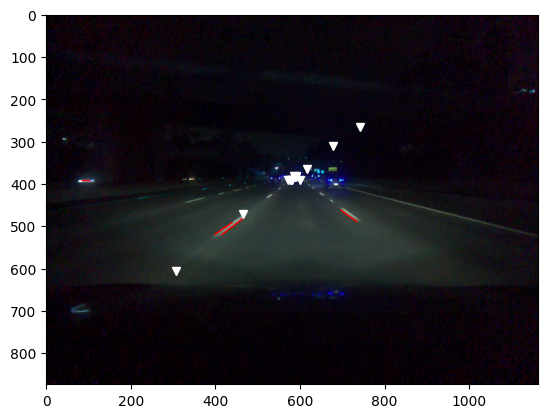

In [4]:
import cv2
import utils
import numpy as np
import matplotlib.pyplot as plt
import random
def detect_edges(image)-> np.ndarray:

    edges = cv2.Canny(image=image, threshold1=100, threshold2=200) 
    return edges


def video_itr(video_file, trace_file):
    cap = cv2.VideoCapture(video_file)

    ret = True
    with open(trace_file,'r+') as tf:
        while ret:
            ret, img = cap.read()
            line = tf.readline()
            line = line[0:-1]
            if line:
                yield (img,np.array([float(x) for x in line.split(" ")]))
    cap.release()


def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def erode_dia(img):
    kernel = np.ones((5,5), np.uint8)
 
    # The first parameter is the original image,
    # kernel is the matrix with which image is
    # convolved and third parameter is the number
    # of iterations, which will determine how much
    # you want to erode/dilate a given image.
    img = cv2.erode(img, kernel, iterations=1)
    img = cv2.dilate(img, kernel, iterations=1)
    return img

def line_detect(image):
    lines = cv2.HoughLinesP(image,1,np.pi/180,40, minLineLength=10)
    return lines

def apply_pipe(image):
    pipeline = [
        preprocess_image,
        erode_dia,
        detect_edges
    ]
    for pipe in pipeline:
        image = pipe(image)
    return image

def process_videos(ret_idx):
    idx = 0
    for (video_file, label_file) in read_files("labeled"):
        for (img, label) in video_itr(video_file, label_file):
            if idx == ret_idx:
                app_img = apply_pipe(img)
                lines = line_detect(app_img)
                return  app_img, img, lines,label
            idx += 1
        # break


def process_lines():
    app_img, image, lines, label = process_videos(random.randint(0,1000))
    valid_lines = []
    epsilon = 0.5
    X_Angle = 0
    for line in lines:
        x1, y1, x2, y2 = line[0]
        valid_lines.append([x1,y1,x2,y2])

    return app_img, image, np.array(valid_lines)


# ransac_iterations,ransac_threshold,ransac_ratio = 350,13,0.93
# print(RANSAC(process_lines()['x'],ransac_iterations,ransac_threshold,ransac_ratio))


app_img, image, valid_lines = process_lines()
print(utils.vanishing_points(valid_lines))

for line in valid_lines:
    x1, y1, x2, y2 = line
    plt.plot([x1,x2], [y1,y2], color="red", linewidth=1)

for pt in utils.vanishing_points(valid_lines):
    if pt:
        plt.plot(pt[0], pt[1], color="white",marker='v')


plt.plot(0,0, color="white", linewidth=100)
plt.imshow(image)




## Approach to do this

K = [
f 0 0 0 
0 f 0 0
0 0 1 0
0 0 0 0]

X = [
    x
    y
    z
    1
]
R = [r1, r2, r3, t] < r1, r2 ,r3 are column vectors>

K@R@X = x <camera projects>
given camera vanishing point from detectioun

for vanishing point 
[0, 0, 1, 0].T  <-  to find r3 => R@X = K.inver @ x => rotation vector r3 and then norm to get then



